<a href="https://colab.research.google.com/github/vferman2000/Springboard/blob/master/capstone2_model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion Image Classification Project

In [0]:
import tensorflow as tf 
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.image as mpimg
import numpy as np 
import pandas as pd 
import os

In [0]:
# Path to fashion product images files on Google Drive

DATASET_PATH = "/content/drive/My Drive/Springboard Data Science/CapstoneTwo/fashion-product-images-small/myntradataset/"
print(os.listdir(DATASET_PATH))

['images', 'styles.csv']


In [0]:
# Reading df_style pandas dataframe which contains images attributes

df_styles = pd.read_csv(DATASET_PATH + 'styles.csv', error_bad_lines=False)
df_styles['image'] = df_styles.apply(lambda row: str(row['id']) + ".jpg", axis=1)
#df_styles['image'] = df_styles.id.apply(lambda row: "%s.jpg" % row)

df_styles['masterCategory'] = df_styles.masterCategory.apply(lambda row: 'NA' if row is np.nan else row)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [0]:
# df_train_validation = df_styles.sample(frac = 0.8)[df_styles['masterCategory'] != 'NA']
# df_test = df_styles.loc[~df_styles.id.isin(df_train_validation.id)]
# df_train = df_train_validation.sample(frac = 0.9)
# df_validation = df_train_validation.loc[~df_styles.id.isin(df_train.id)]

In [0]:
# Selecting a sample of image id's from df_style dataframe to construct train, validation, test data

df_selected = df_styles.sample(frac = 0.75)
df_train_validation = df_selected.sample(frac = 0.8)[df_selected['masterCategory'] != 'NA']
df_test = df_selected.loc[~df_selected.id.isin(df_train_validation.id)]
df_train = df_train_validation.sample(frac = 0.9)
df_validation = df_train_validation.loc[~df_selected.id.isin(df_train.id)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [0]:
# number of classes in masterCategory column of df_train

K = len(set(df_train.iloc[:,2]))
print(K)


7


In [0]:
# Path to images folder

images_data = DATASET_PATH+"images/"

# Building the Convolutional Neural Network Model

In [0]:
# Build the convolutional Neural Network model using the functional API


i= Input(shape=(80, 60, 3))
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [0]:
# Using ImageDataGenerator to correlate images from image folder to masterCategory column in df_train, df_validation an df_test 

from keras.preprocessing.image import ImageDataGenerator
HEIGHT = 80
WIDTH = 60
batch_size = 32
datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator=datagen.flow_from_dataframe(
                    dataframe=df_train,
                    directory=images_data,
                    x_col="image",
                    y_col="masterCategory",
                    batch_size=batch_size,
                    seed=42,
                    shuffle=True,
                    class_mode="categorical",
                    classes=['Footwear', 'Apparel', 'Accessories', 'Personal Care','Free Items','Sporting Goods', 'Home'],
                    target_size=(HEIGHT,WIDTH))

valid_generator=test_datagen.flow_from_dataframe(
                    dataframe=df_validation,
                    directory=images_data,
                    x_col="image",
                    y_col="masterCategory",
                    batch_size=batch_size,
                    seed=42,
                    shuffle=True,
                    class_mode="categorical",
                    classes=['Footwear', 'Apparel', 'Accessories', 'Personal Care', 'Free Items','Sporting Goods','Home'],
                    target_size=(HEIGHT,WIDTH))

test_generator=test_datagen.flow_from_dataframe(
                    dataframe=df_test,
                    directory=images_data,
                    x_col="image",
                    batch_size=batch_size,
                    seed=42,
                    shuffle=False,
                    class_mode=None,
                    target_size=(HEIGHT,WIDTH))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 2 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 23987 validated image filenames belonging to 7 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 2664 validated image filenames belonging to 7 classes.
Found 6663 validated image filenames.


# Compiling and Fitting the Model

In [0]:
# Compiling the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Fitting the model
model_output = model.fit(train_generator, validation_data=valid_generator, steps_per_epoch=80, epochs=5)

Epoch 1/5
80/80 [==============================] - 4197s 52s/step - loss: 1.3906 - accuracy: 0.6543 - val_loss: 1.5989 - val_accuracy: 0.2256
Epoch 2/5
80/80 [==============================] - 1722s 22s/step - loss: 0.5201 - accuracy: 0.8254 - val_loss: 1.9395 - val_accuracy: 0.1918
Epoch 3/5
80/80 [==============================] - 1478s 18s/step - loss: 0.3765 - accuracy: 0.8687 - val_loss: 1.4069 - val_accuracy: 0.4306
Epoch 4/5
80/80 [==============================] - 1371s 17s/step - loss: 0.3026 - accuracy: 0.9008 - val_loss: 2.0183 - val_accuracy: 0.2538
Epoch 5/5
80/80 [==============================] - 1267s 16s/step - loss: 0.2694 - accuracy: 0.9141 - val_loss: 0.3488 - val_accuracy: 0.9253


In [0]:
from keras.models import load_model
model.save('/content/drive/My Drive/Springboard Data Science/CapstoneTwo/fifth_model.h5')

# Testing the Model

In [0]:
test_generator.reset()

In [0]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
pred=model.predict(test_generator,verbose=1,steps=test_steps_per_epoch)

209/209 [==============================] - 4810s 23s/step


In [0]:
predicted_class_indices=np.argmax(pred,axis=1)

In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [0]:
filenames=test_generator.filenames
results=pd.DataFrame({"image":filenames,
                      "predictions":predictions})

In [0]:
true_and_predicted_labels = pd.merge(df_test[['id','image','masterCategory']], results, on="image")
true_and_predicted_labels.head()
x = true_and_predicted_labels['masterCategory'].unique()
print(x)

['Accessories' 'Footwear' 'Apparel' 'Personal Care' 'Free Items'
 'Sporting Goods']


In [0]:
true_and_predicted_labels['correct_label'] = np.where(true_and_predicted_labels.masterCategory == true_and_predicted_labels.predictions, 1, 0)
print('Test prediction accuracy:', true_and_predicted_labels['correct_label'].sum()/len(true_and_predicted_labels.predictions)*100)
true_and_predicted_labels.head()


Test prediction accuracy: 91.25018760318176


,id,image,masterCategory,predictions,correct_label
0,46177,46177.jpg,Accessories,Accessories,1
1,7597,7597.jpg,Footwear,Footwear,1
2,41459,41459.jpg,Footwear,Footwear,1
3,11648,11648.jpg,Accessories,Accessories,1
4,54548,54548.jpg,Apparel,Apparel,1


# Model Evaluation

In [0]:
score = model.evaluate(valid_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

84/84 [==============================] - 11s 135ms/step - loss: 0.3488 - accuracy: 0.9253
Test loss: 0.3488161265850067
Test accuracy: 0.9253003001213074


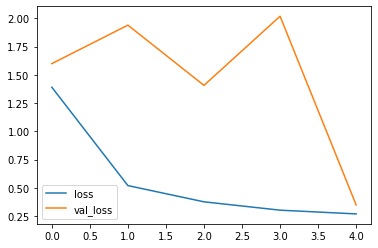

In [0]:
# Plot loss per iteration
plt.plot(model_output.history['loss'], label='loss')
plt.plot(model_output.history['val_loss'], label='val_loss')
plt.legend()

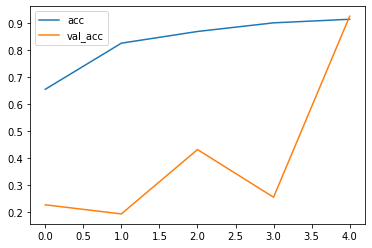

In [0]:
# Plot accuracy per iteration
plt.plot(model_output.history['accuracy'], label='acc')
plt.plot(model_output.history['val_accuracy'], label='val_acc')
plt.legend()

# Confusion Matrix

In [0]:
#Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# valid_steps_per_epoch = np.math.ceil(valid_generator.samples / valid_generator.batch_size)
# valid_pred=model.predict(valid_generator,verbose=1,steps=valid_steps_per_epoch)
# predicted_valid_classes=np.argmax(valid_pred,axis=1)

# true_classes = valid_generator.classes
# class_labels = ['Personal Care','Apparel','Accessories', 'Footwear', 'Free Items']

# report = metrics.classification_report(true_classes, predicted_valid_classes, target_names=class_labels)
# print(report)   

valid_generator.reset()
test_steps_per_epoch = np.math.ceil(valid_generator.samples / valid_generator.batch_size)
Y_pred=model.predict(valid_generator,verbose=1,steps=test_steps_per_epoch)

classes = valid_generator.classes
y_pred = np.argmax(Y_pred, axis=-1)
sum(y_pred==classes)/10000

confusion_matrix(valid_generator.classes,y_pred)

84/84 [==============================] - 11s 129ms/step


array([[168, 376, 139,   0,  30,   0],
       [301, 672, 256,   0,  55,   0],
       [117, 277,  91,   0,  26,   0],
       [  1,   4,   0,   0,   0,   0],
       [ 35,  76,  34,   0,   4,   0],
       [  0,   2,   0,   0,   0,   0]])

In [0]:
labels_x = (valid_generator.class_indices)
labels_x = dict((v,k) for k,v in labels_x.items())
predictions_x = [labels[k] for k in predicted_valid_classes]

filenames_x=valid_generator.filenames
results_x=pd.DataFrame({"image":filenames_x,
                      "predictions":predictions_x})

true_and_predicted_labels_x = pd.merge(df_test[['image','masterCategory']], results, on="image")
true_and_predicted_labels_x.head()
xy = true_and_predicted_labels['predictions'].unique()
print(xy)

['Accessories' 'Apparel' 'Footwear' 'Personal Care']


84/84 [==============================] - 11s 132ms/step
Confusion matrix, without normalization
[[168 374 142   0  29   0]
 [325 675 226   0  58   0]
 [ 93 281 117   0  20   0]
 [  2   1   1   0   1   0]
 [ 34  75  33   0   7   0]
 [  0   1   1   0   0   0]]


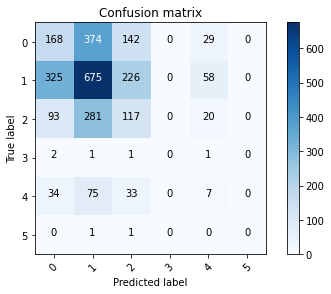

In [0]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

valid_generator.reset()
valid_steps_per_epoch = np.math.ceil(valid_generator.samples / valid_generator.batch_size)
p_test=model.predict(valid_generator,verbose=1,steps=valid_steps_per_epoch).argmax(axis=1)

cm = confusion_matrix(valid_generator.classes, p_test)
plot_confusion_matrix(cm, list(range(6)))




# Examples of Misclassified Images

In [0]:
misclassified_idx = pd.DataFrame()
misclassified_idx = true_and_predicted_labels.loc[true_and_predicted_labels['correct_label'] == 0].copy()

import cv2
from google.colab.patches import cv2_imshow

def plot_figures(figures, nrows = 1, ncols=1):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    
def img_path(img):
    return images_data+img

def load_image(img):
    resized_fac = 2
    img     = cv2.imread(img_path(img))
    w, h, _ = img.shape
    #resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return img



(80, 60, 3)


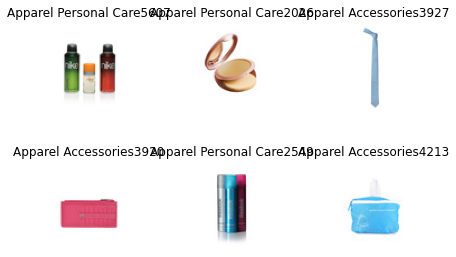

In [0]:
# generation of a dictionary of (title, images)
figures = {misclassified_idx.predictions[i]+" "+misclassified_idx.masterCategory[i]+str(i): load_image(row.image) for i, row in misclassified_idx.sample(6).iterrows()}
#plot of the images in a figure, with 2 rows and 3 columns
print(load_image(misclassified_idx.iloc[0].image).shape)
plot_figures(figures, 2, 3)

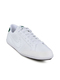

In [0]:
def img_path(img):
    return images_data+img

def load (img):
    img = cv2.imread(img)
    return img

cv2_imshow(img)

load("3215.jpg")

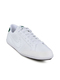

In [0]:
from google.colab.patches import cv2_imshow
img = cv2.imread(DATASET_PATH+"images/3215.jpg")
cv2_imshow(img)